In [1]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime

In [11]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mse(predict,target):
    return ((predict-target)**2).mean()

def mae(predict,target):
    return (abs(predict-target)).mean()

def mape(predict,target):
    return ( abs((target - predict) / target).mean()) * 100

In [21]:
#loading covid data 
cv  = pd.read_csv('drive/My Drive/Thesis/Data/covid_data_2021.csv')
cv_case = cv[['Date','New Cases']]
cv_case = cv_case[:38]




# ===========================================
Linear Regression

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 30079226.0000
Epoch [200/1000], Loss: 27793810.0000
Epoch [300/1000], Loss: 25715606.0000
Epoch [400/1000], Loss: 23825832.0000
Epoch [500/1000], Loss: 22107394.0000
Epoch [600/1000], Loss: 20544768.0000
Epoch [700/1000], Loss: 19123824.0000
Epoch [800/1000], Loss: 17831714.0000
Epoch [900/1000], Loss: 16656757.0000
Epoch [1000/1000], Loss: 15588329.0000


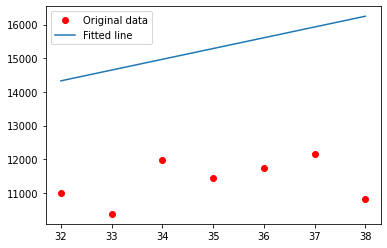

In [22]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

# Toy dataset
cv_case['day_count'] = list(range(1,len(cv_case)+1))
ydata = [i for i in cv_case['New Cases']]
xdata = cv_case['day_count']
ydata = np.array(ydata,  dtype=np.float32)
xdata = np.array(xdata, dtype=np.float32)

x_train = xdata[:31]
y_train = ydata[:31]
x_test= xdata[31:38]
y_test= ydata[31:38]

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train).reshape(-1,1)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_test).reshape(-1,1)).detach().numpy()
plt.plot(x_test, y_test, 'ro', label='Original data')
plt.plot(x_test, predicted, label='Fitted line')
plt.legend()
plt.show()

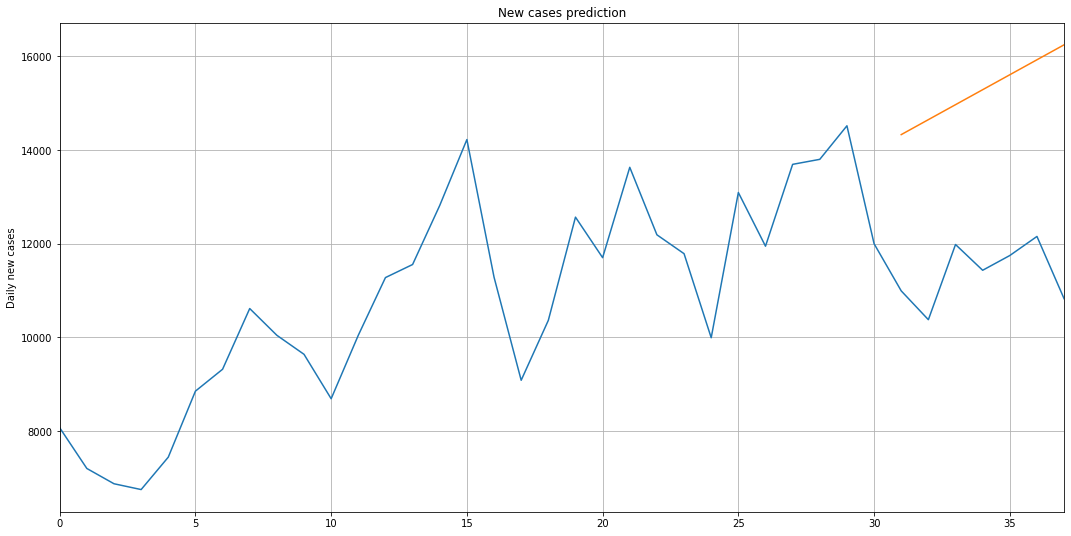

In [26]:
#plotting prediction
model = 'linear_regression'
dr = 'drive/My Drive/Thesis/Data/images/prediction1/'
x = np.arange(31, 38, 1)
plt.subplots(figsize=(18, 9))
plt.title('New cases prediction')
plt.ylabel('Daily new cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(cv_case['New Cases'])
plt.plot(x, predicted)
plt.savefig(dr + model + '_prediction')   
plt.show()

In [24]:
print('MAE : ', mae( y_test, pre))
print('MAPE : ', mape( y_test, pre))
print('MSE : ', mse( y_test, pre))
print('RMSE : ', rmse( y_test, pre))

MAE :  3928.072998046875
MAPE :  25.62107741832733
MSE :  15946649.0
RMSE :  3993.3255564754545


Exponential Smoothing

In [15]:
ydata = [i for i in cv_case['New Cases']]
xdata = cv_case['day_count']
ydata = np.array(ydata,  dtype=np.float32)
xdata = np.array(xdata, dtype=np.float32)

x_train = xdata[:31]
y_train = ydata[:31]
x_test= xdata[31:38]
y_test= ydata[31:38]

predict_date = 7


In [19]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y_to_train,y_to_test,smoothing_level,predict_date):
    
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date)

    #plotting prediction
    model = 'ses_sl'
    dr = 'drive/My Drive/Thesis/Data/images/prediction1/'
    x = np.arange(31, 38, 1)
    plt.subplots(figsize=(18, 9))
    plt.title('New cases prediction')
    plt.ylabel('Daily new cases')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.plot(cv_case['New Cases'])
    plt.plot(x, fcast1)
    plt.savefig(dr + model + '_prediction')   
    plt.show()
    print('MAE : ', mae( fcast1, y_to_test))
    print('MAPE : ', mape( fcast1, y_to_test))
    print('MSE : ', mse( fcast1, y_to_test))
    print('RMSE : ', rmse( fcast1, y_to_test))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date)
    # plot
    model = 'ses_o'
    dr = 'drive/My Drive/Thesis/Data/images/prediction1/'
    x = np.arange(31, 38, 1)
    plt.subplots(figsize=(18, 9))
    plt.title('New cases prediction')
    plt.ylabel('Daily new cases')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.plot(cv_case['New Cases'])
    plt.plot(x, fcast2)
    plt.savefig(dr + model + '_prediction')   
    plt.show()
    
    print('MAE : ', mae( fcast2, y_to_test))
    print('MAPE : ', mape( fcast2, y_to_test))
    print('MSE : ', mse( fcast2, y_to_test))
    print('RMSE : ', rmse( fcast2, y_to_test))
    
    

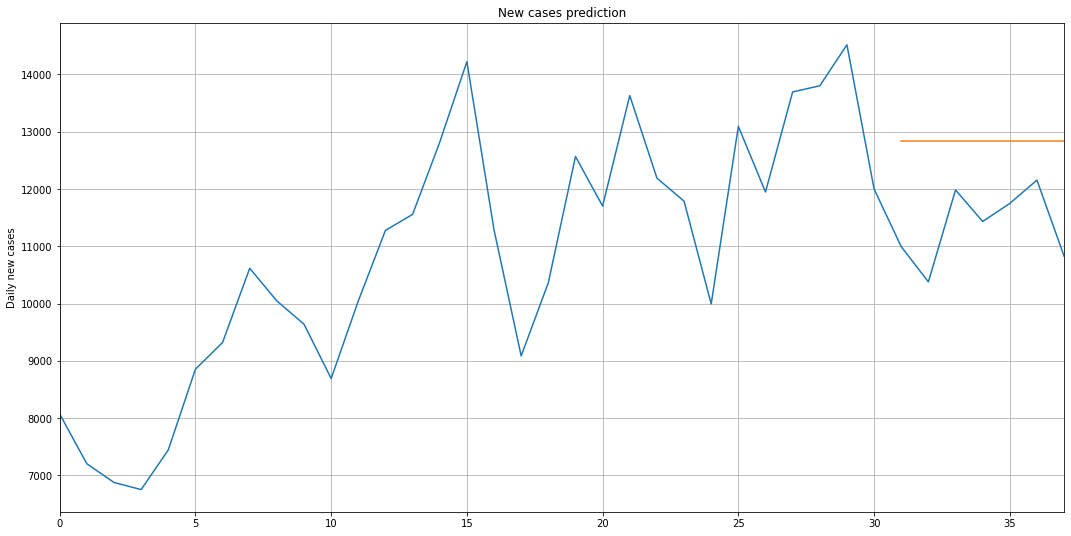

MAE :  1483.6554629639988
MAPE :  13.385623065545731
MSE :  2566975.4919665908
RMSE :  1602.1783583504648


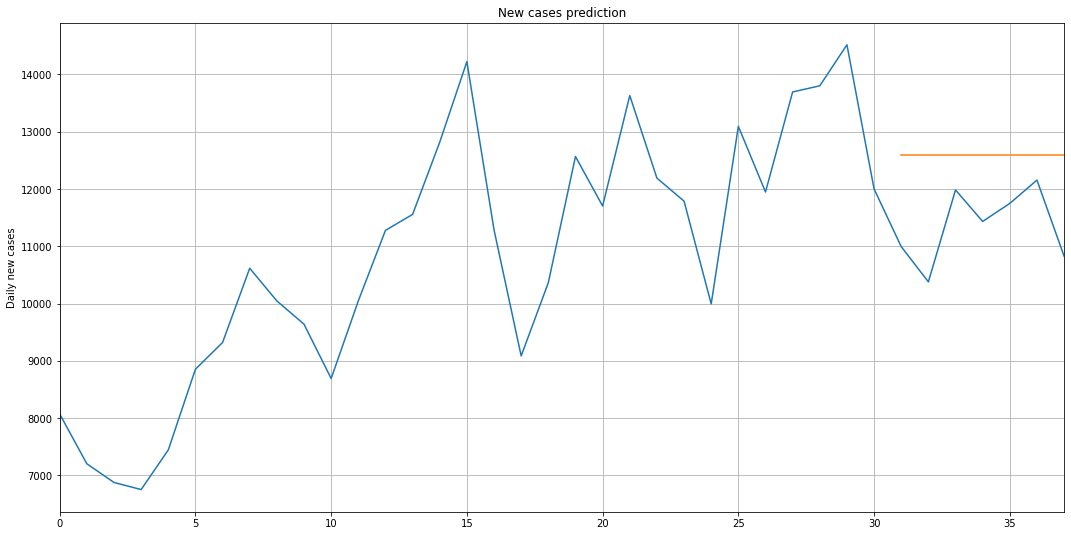

MAE :  1233.643438891367
MAPE :  11.178554889454166
MSE :  1887618.0935033911
RMSE :  1373.9061443575363


In [20]:
ses(y_train,y_test,0.6,predict_date)